In [ ]:
import tensorflow as tf
import os
from tensorflow.keras import Model

## Data Path

In [ ]:
basedir = 'data'
print(os.listdir(basedir))

['kucing sehat', 'train', 'val']


In [ ]:
traindir = os.path.join(basedir, 'train')
valdir = os.path.join(basedir, 'val')

## Data Preprocess

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(traindir,
                                                            shuffle=True,
                                                            batch_size=2,
                                                            image_size=(224, 224))
valdir_dataset = tf.keras.utils.image_dataset_from_directory(valdir,
                                                            shuffle=True,
                                                            batch_size=2
                                                             ,
                                                            image_size=(224, 224))

train_dataset_final = train_dataset.cache().shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valdir_dataset_final = valdir_dataset.cache().shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Found 802 files belonging to 6 classes.
Found 73 files belonging to 6 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
], name="data_augmentation")

In [ ]:
traain_dataset_final = train_dataset_final.map(lambda x, y: (data_augmentation(x, training=True), y))

## Callback

In [ ]:

class CustomEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, patience=0):
        super(CustomEarlyStopping, self).__init__()
        self.patience = patience
        self.best_val_accuracy = 0
        self.best_val_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')
        current_val_loss = logs.get('val_loss')

        if current_val_accuracy > self.best_val_accuracy and current_val_loss < self.best_val_loss:
            self.best_val_accuracy = current_val_accuracy
            self.best_val_loss = current_val_loss
            self.wait = 0  # Reset wait if we have a new best
        else:
            self.wait += 1

        if self.wait >= self.patience:
            print(f"\nEarly stopping at epoch {epoch + 1}")
            self.model.stop_training = True


##Buat Model

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.applications import MobileNetV2


In [ ]:
# Hyperparameters
patience = 25  # Number of epochs with no improvement after which training will be stopped

# Instantiate your custom callback
custom_callback = CustomEarlyStopping(patience=patience)

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [ ]:
inputs = pretrained_model.input
x = Dense(256, activation='relu')(pretrained_model.output)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
history = model.fit(
    train_dataset_final,

    validation_data=valdir_dataset_final,

    epochs=100,

)

Epoch 1/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 80s 147ms/step - accuracy: 0.1822 - loss: 2.0298 - val_accuracy: 0.2466 - val_loss: 1.7438
Epoch 2/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 48s 119ms/step - accuracy: 0.2207 - loss: 1.8828 - val_accuracy: 0.3562 - val_loss: 1.6185
Epoch 3/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 46s 114ms/step - accuracy: 0.2780 - loss: 1.6874 - val_accuracy: 0.4110 - val_loss: 1.5040
Epoch 4/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 59s 147ms/step - accuracy: 0.3531 - loss: 1.5691 - val_accuracy: 0.4932 - val_loss: 1.4005
Epoch 5/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 59s 146ms/step - accuracy: 0.4197 - loss: 1.4413 - val_accuracy: 0.5753 - val_loss: 1.3100
Epoch 6/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 59s 147ms/step - accuracy: 0.4746 - loss: 1.3743 - val_accuracy: 0.5753 - val_loss: 1.2298
Epoch 7/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 56s 139ms/step - accuracy: 0.5253 - loss: 1.2956 - val_accuracy: 0.6027 - val_loss: 1.1437
Epoch 8/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 59s 146ms/step - accuracy: 0.5972 -

In [ ]:
model.summary()

In [ ]:
model.save('kucingku_sehat.h5')

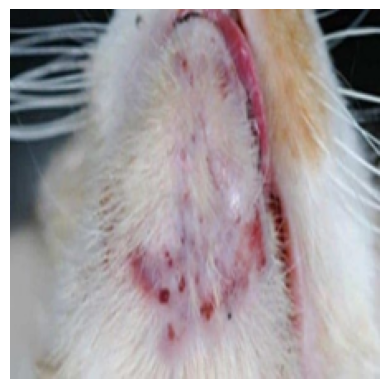

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Kondisi kucing  acne 


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib untuk menampilkan gambar

# Load the image
image_path = 'acne.jpg'
image = tf.keras.utils.load_img(image_path)

# Resize the image to (224, 224)
image = image.resize((224, 224))

# Convert the resized image to a numpy array
img_array = tf.keras.utils.img_to_array(image)

# Expand dimensions to match the model input shape (1, 224, 224, 3)
img_bat = tf.expand_dims(img_array, 0)

# Menampilkan gambar
plt.imshow(image)
plt.axis('off')  # Menghilangkan sumbu
plt.show()

# Make predictions
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
data_cat = train_dataset.class_names

print('Kondisi kucing  {} '.format(data_cat[np.argmax(score)]))
